# Homework 8. Supervised learning on diabete datasets

## Introduction 
* Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. 
* Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream.

### Goals
* I am classified diabetic patients by using several ML models.

#### Machine Learning Models

* Logistic Regression
* KNN
* SVM
* Navie Bayesian
* Decision Tree
* Random Forest 
* Artificial Neural Networks


### Dataset Informations
* **Name:** [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* **Feautres:** 9 clinical features for prediction 



## Content

1. [Read and Examination Dataset](#1)
    * [Basic Visualization](#2)
2. [Exploratory Data Analysis](#3)
    * [Feautre Visualization with Box plot [Before Standardization]](#4)
    * [Analysis of Diabetic Cases](#5)
    * [Analysis of Non-Diabetic Cases](#6)
    * [Visualization of Features](#7)
    * [Outlier Detection](#8)
3. [Train Test Split & Standardization Processing](#9)
    * [Box Plot Visualization after the Standardization](#10)
4. [Machine Learning Models](#11)
    * [Logistic Regression (LR)](#12)
    * [K-nearest neighbors (KNN) & PCA Analysis](#13)
    * [Support Vector Machine (SVM)](#14)
    * [Naive Bayesian (NB)](#15)
    * [Decision Tree](#16)
    * [Random Forest (RF)](#17)
    * [Artificial Neural Networks (ANN)](#18)
    * [Gradient Boosting Machines (GBM)](#19)
5. [Evaluation of Results](#20)
    * [F1 Score Calculation](#21)
    * [Results Visualization](#22)


## Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix #Sonuç değerlendirme
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor #Trainin algoritması ve NCA ve Outlier değerler için
from sklearn.decomposition import PCA #PCA için

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

<a id ="1"></a><br>
# Read and Examination Dataset

In [2]:
#read data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Split Data as M&B
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

<a id ="2"></a><br>
### Basic Visualization

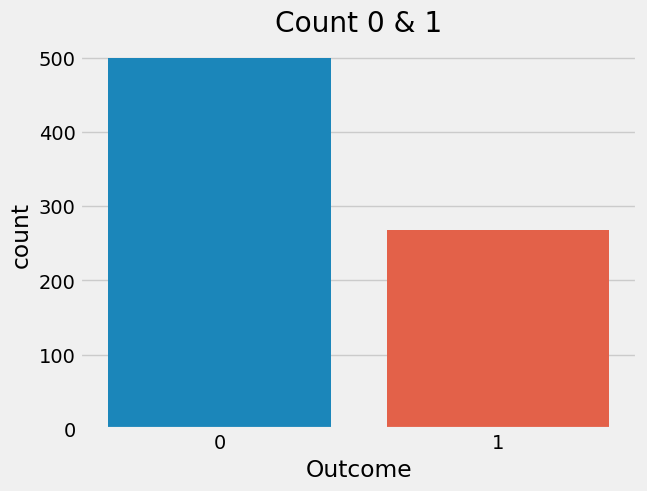

In [4]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

<a id ="3"></a><br>
# Exploratory Data Analysis

#### 1(a)
rubric={points:1}

Make exploratory analysis of the data

Hint: use shape, info() and describe()

1(a) solution

In [5]:
print('Data Shape', data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### 1(b)
rubric={points:1}

1. calculate the correlation between the features 2. make a plot using clustermap in sns with "annot=True".

1(b) solution:

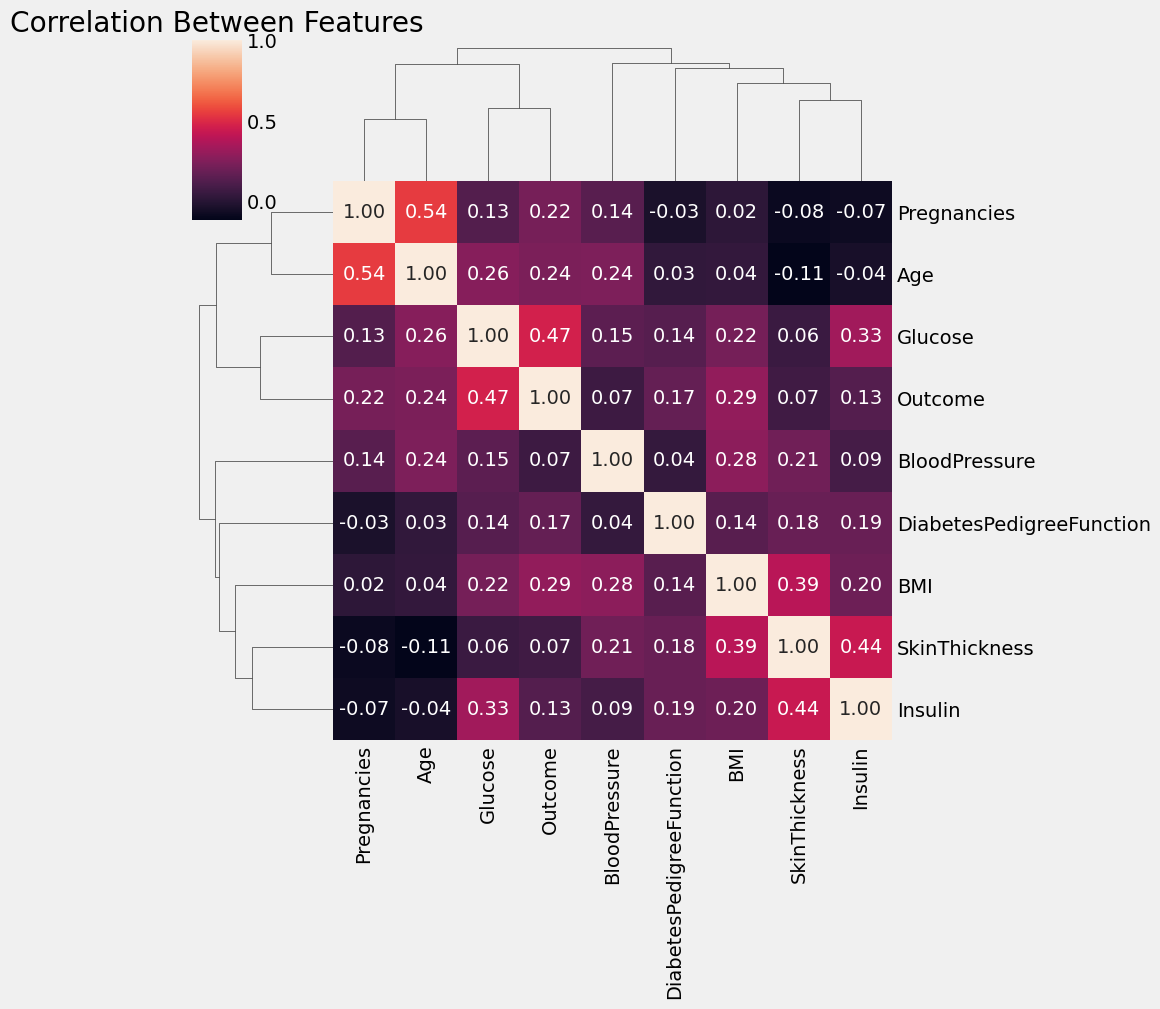

In [6]:
corr_data = data.corr()
sns.clustermap(corr_data,annot=True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

<a id ="4"></a><br>
## Feautre Visualization with Box plot [Before Standardization]

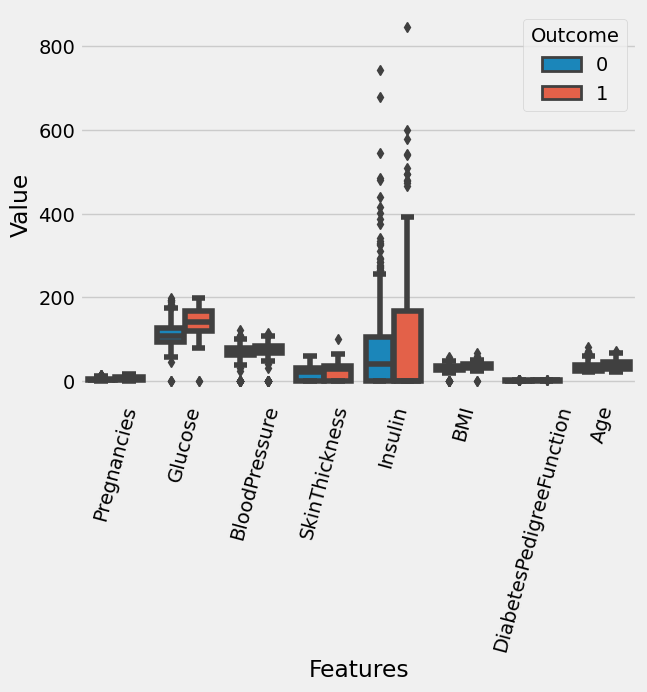

In [7]:

data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted) 
plt.xticks(rotation=75) 
plt.show()


<a id ="5"></a><br>
## Analysis of Diabetic Cases

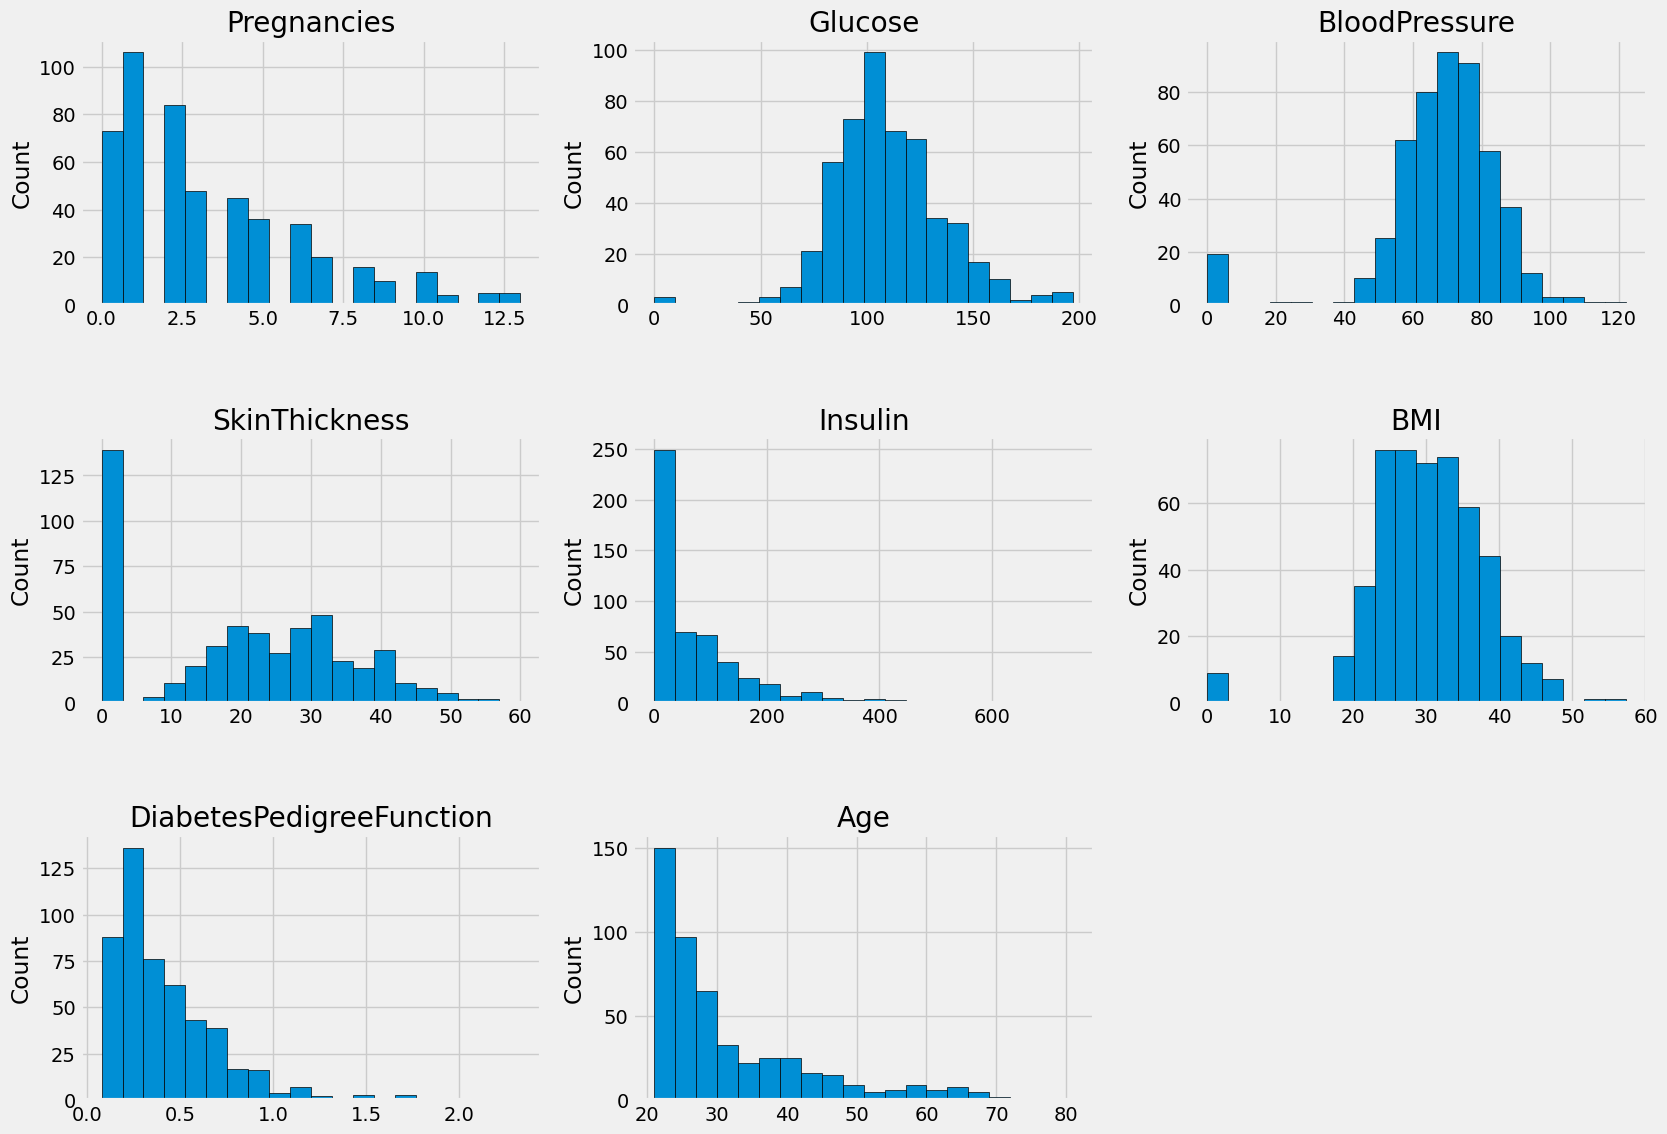

In [8]:
#General Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length / 2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a id ="6"></a><br>
## Analysis of Non-Diabetic Cases

#### 1(c)
rubric={points:1}

Follow the example above to do general analysis of non-diabetic cases

1(c) solution

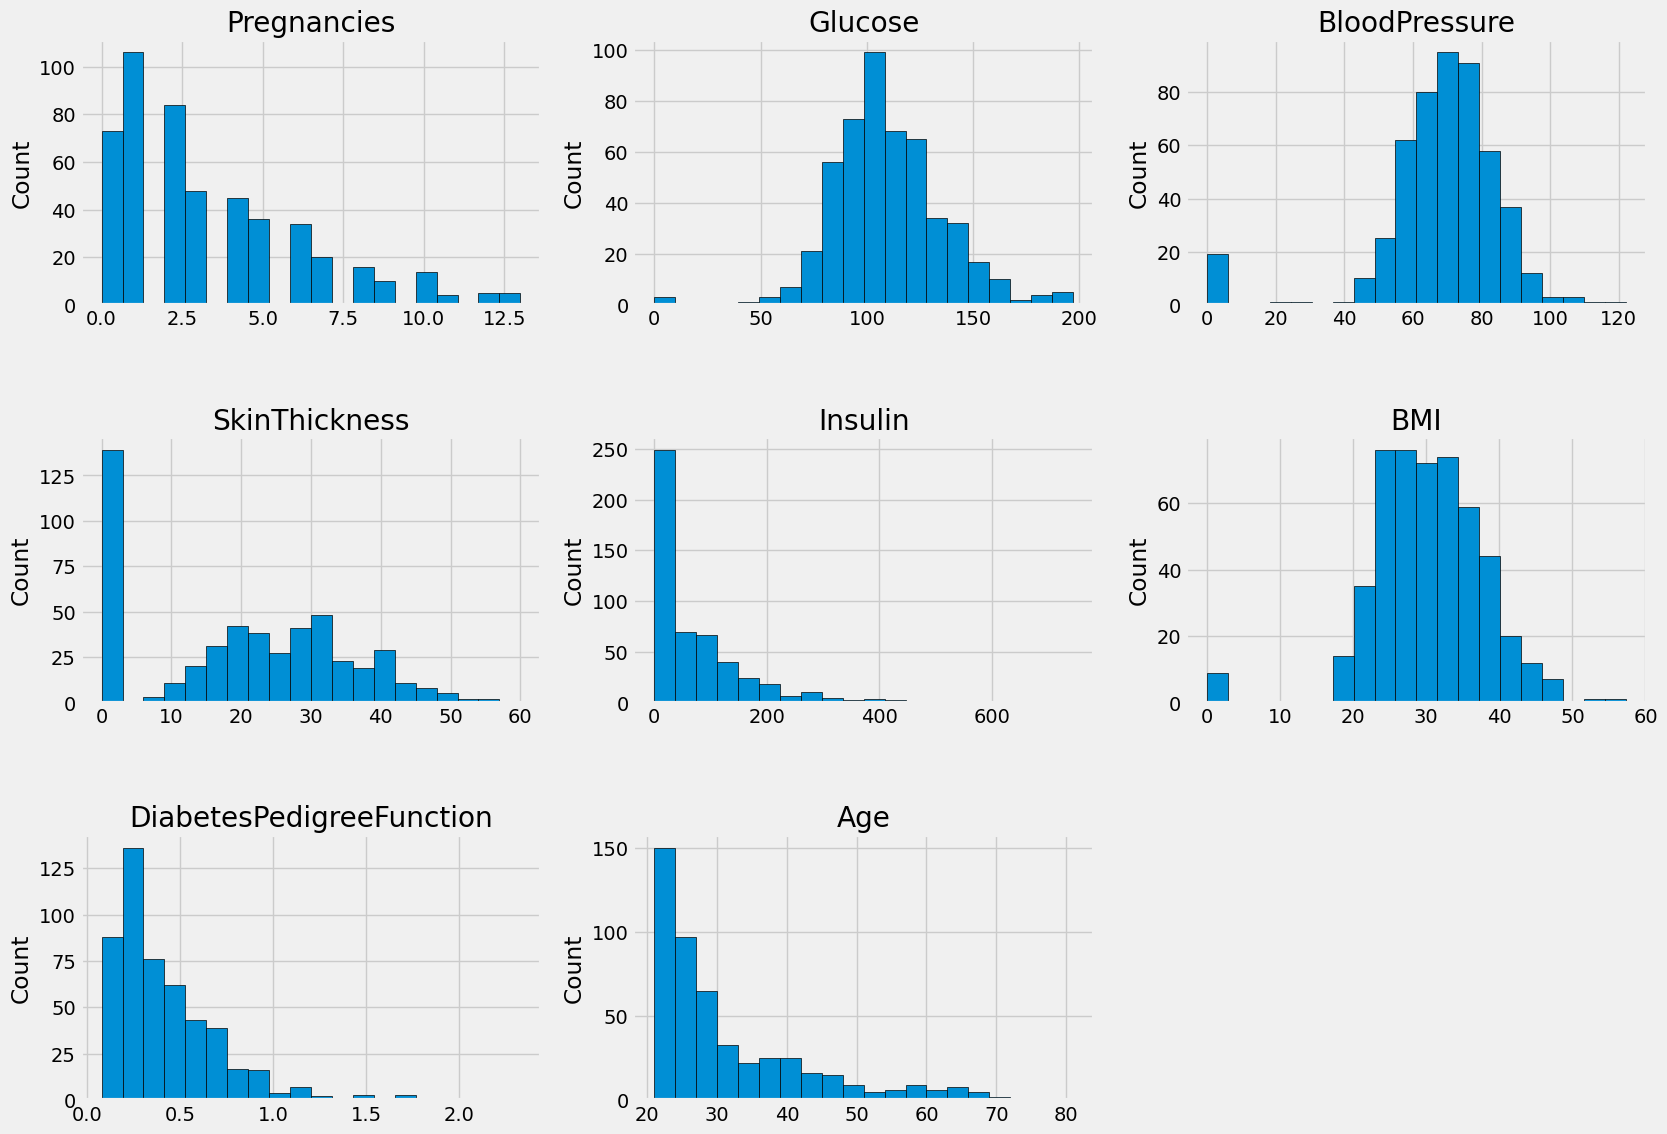

In [9]:
#General Analysis
data0 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length / 2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data0[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a id ="7"></a><br>
## Visualization of Features

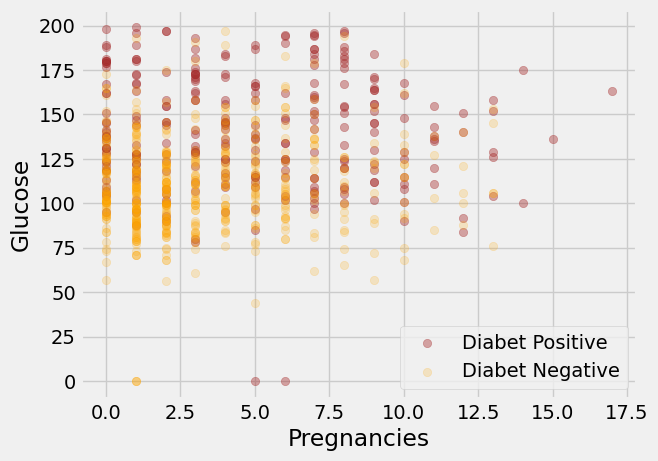

In [10]:


plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

#We appear that it is clear segregation.

#### 1(d)
rubric={points:1}

Follow the example above to make scatter plot for "Age" vs "Pregnancies" in diabetic positive cases and diabetic negative cases.

For diabetic positive cases, use color = "lime", alpha = 0.4

For diabetic negative cases, use color = "black", alpha = 0.2

1(d) solution:

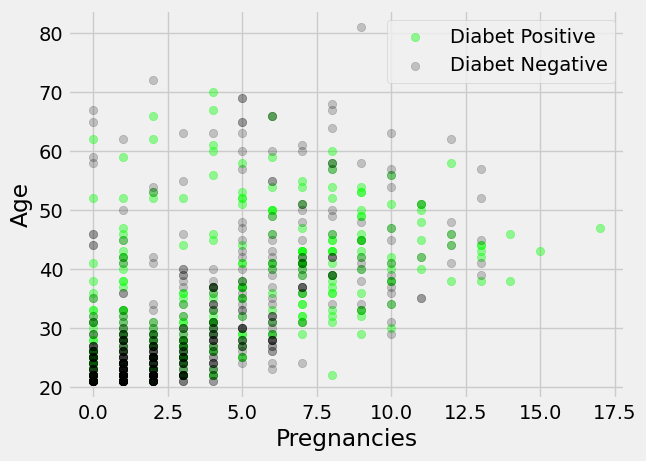

In [11]:
#Visualization, Scatter Plot

plt.scatter(p.Pregnancies,p.Age,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Age,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Age")
plt.legend()
plt.show()

#We appear that it is clear segregation.

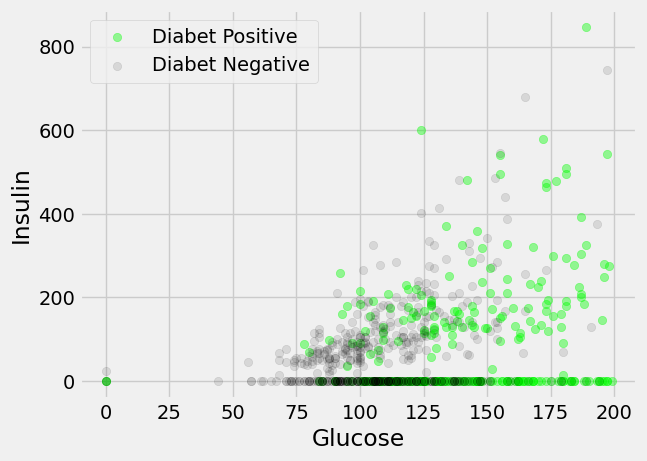

In [12]:
#Visualization, Scatter Plot

plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

#We appear that it is clear segregation.

<a id ="8"></a><br>
## Outlier Detection

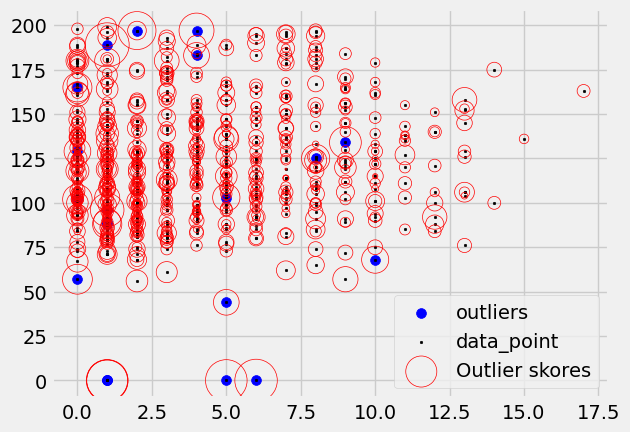

In [13]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() 

clf = LocalOutlierFactor() 
y_pred = clf.fit_predict(x) 

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() 

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point')

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) 
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

### Drop Outliers

In [14]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values #outliers remove

<a id ="9"></a><br>
# Train Tespt Split & Standardization Processing

#### 1(e)
rubric={points:1}

1. use test_size = 0.2
2. split the data into training and test sets with random_state = 42.

1(e) solution:

In [15]:
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### 1(f)
rubric={points:1}

1. create a StandardScaler
2. fit_transform the training data
3. transform the test data

1(f) solution

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

<a id ="10"></a><br>
## Box Plot Visualization after the Standardization

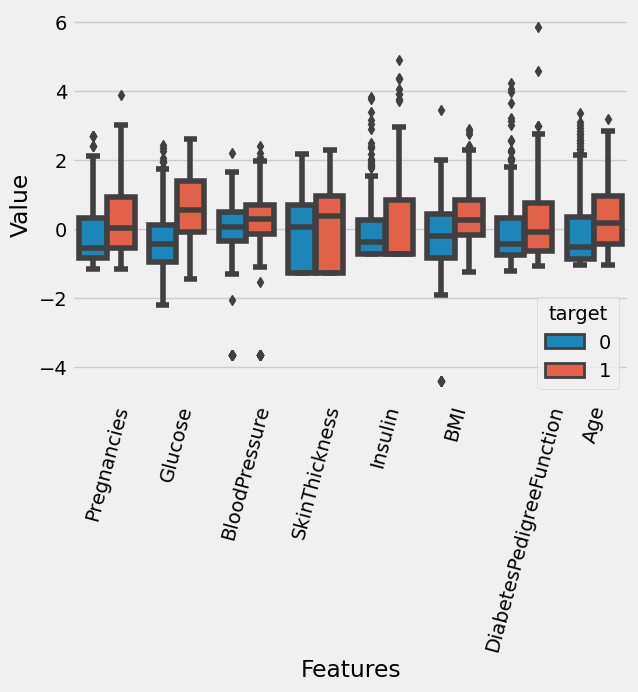

In [17]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) 
plt.xticks(rotation=75) 
plt.show()

<a id ="11"></a><br>
# Machine Learning Models

<a id ="12"></a><br>
## Logistic Regression (LR)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#### 1(g)
rubric={points:1}

Calcuate the accuracy using cross_val_score with 10-fold cross validation. 

1(g) solution:

In [19]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(LR, x_train, y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7502542372881356
Standart Deviation Accuracies:  0.04536417977366145


In [20]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.86


#### 1(h)
rubric={points:1}

Calcuate the confusion matrix using y and y_pred

1(h) solution:

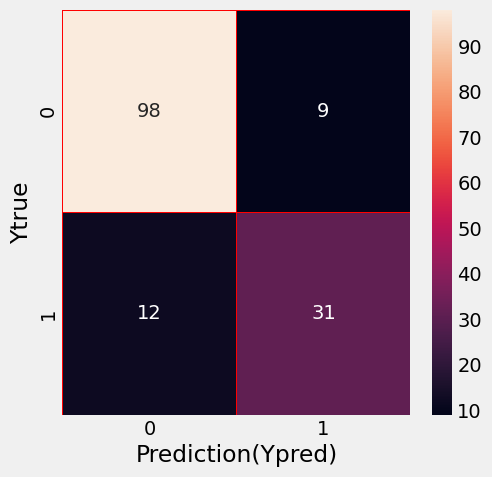

In [21]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue, yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="13"></a><br>
## K-nearest neighbors (KNN) & PCA Analysis

#### 1(i)
rubric={points:1}

1. fit the kNN model
2. make the prediction on x_test
3. calculate the confusion matrix
4. calculate the accuracy on real test data and predict test data
5. score the x_test

In [64]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) #Calculation (In the supervise learning this section = training)
y_predict = knn.predict(x_test) #Test Section
cm = confusion_matrix(y_test, y_predict) #Ploting
acc =  accuracy_score(y_test, y_predict) #Accuracy Score
score = knn.score(x_test, y_test) #score the x_test and y_test


print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

Score: 0.7733333333333333
CM: [[101   6]
 [ 28  15]]
Basic KNN Acc: 0.7733333333333333


In [23]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51)) 
    
    weight_options = ['uniform','distance'] 

    distance_options = [1,2] 

    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) 


    knn =KNeighborsClassifier() 

    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') 

    grid.fit(x_train, y_train) 

    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) 

    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [24]:
grid = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.7517796610169492 with parametres: {'n_neighbors': 39, 'p': 1, 'weights': 'distance'}

Test Score: 0.88, Train Score: 1.0

CM Test: [[102   5]
 [ 13  30]]
CM Train: [[380   0]
 [  0 217]]


In [25]:
KNNscore = grid.best_score_

Text(0.5, 1.0, 'PCA: P1 Vs P2')

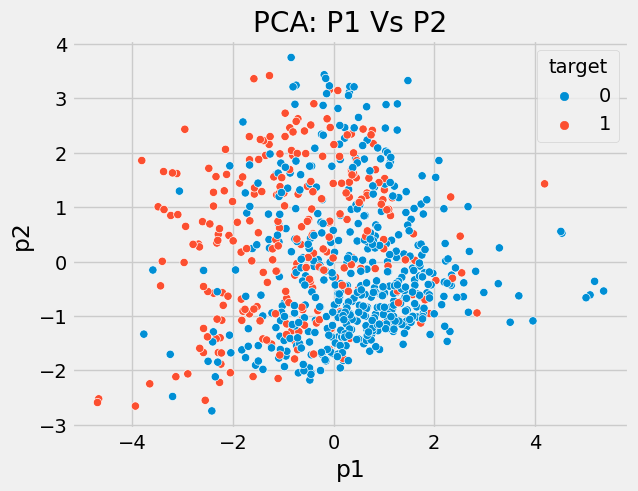

In [26]:
#%% PCA

scale = StandardScaler()
x_scaled = scaler.fit_transform(x) #x verisi bölünmeden tam bir şekilde PCA için scale edildi. 
#Is there a translation for the Turkish comments? 
pca = PCA(n_components=2) #2 componentli bir PCA oluşturduk.
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled) #2feature'a yani boyuta düşürülmüş x 
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) #reduce datadan incelemek için bir dataframe oluşturuldu
pca_data['target'] = y #buna target eklendi. Görselleştirmek için gerekli.

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) # targeta göre renklendirilmiş grafik
plt.title('PCA: P1 Vs P2')

In [27]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)

grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)



Best training score: 0.6901129943502825 with parametres: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

Test Score: 0.7733333333333333, Train Score: 0.7671691792294807

CM Test: [[95 12]
 [22 21]]
CM Train: [[354  26]
 [113 104]]


Text(0.5, 1.0, "2-Class classification (k = 6, weights = 'uniform')")

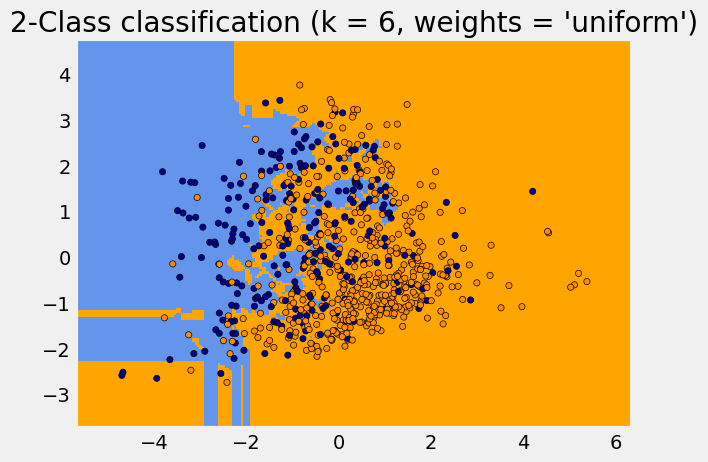

In [28]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

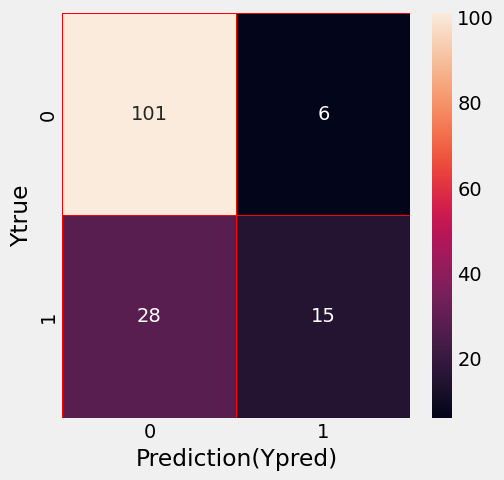

In [29]:
#Confusion Matrix

yprediciton2= knn.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="14"></a><br>
## Support Vector Machine (SVM)

In [30]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

#### 1(j)
rubric={points:1}

Calcuate cross_val_score using SVM model with 5-fold cross validation

1(j) solution:

In [31]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(SVM, x_train, y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7387394957983193
Standart Deviation Accuracies:  0.060221832411610915


In [32]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.84


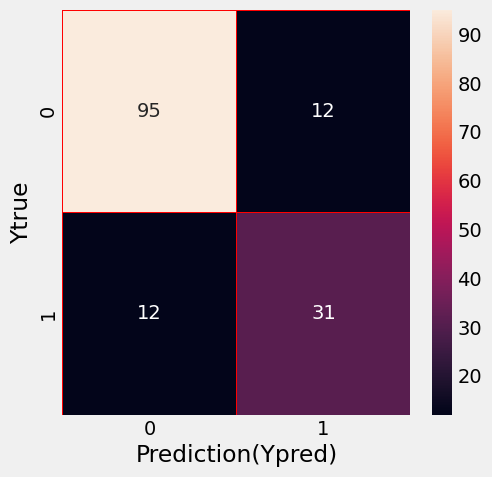

In [33]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="15"></a><br>
# Naive Bayes (NB)

In [34]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

#### 1(k)
rubric={points:1}

Calcuate cross_val_score using NB model with 35-fold cross validation

1(k) solution:

In [35]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(NB, x_train, y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7342670401493933
Standart Deviation Accuracies:  0.11802970097658376


In [36]:
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.84


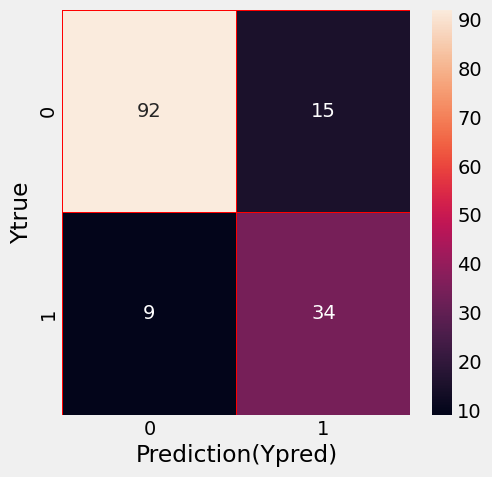

In [37]:
#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="16"></a><br>
## Decision Tree
<img src="https://emerj.com/wp-content/uploads/2018/04/3049155-poster-p-1-machine-learning-is-just-a-big-game-of-plinko.gif" width="500px">


In [38]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

#### 1(l)
rubric={points:1}

Calcuate cross_val_score using decision tree model with 55-fold cross validation

1(l) solution:

In [39]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(DTC, x_train, y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.6662809917355371
Standart Deviation Accuracies:  0.14655239332333878


In [40]:
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTCscore = DTC.score(x_test,y_test)

Decision Tree Score:  0.7066666666666667


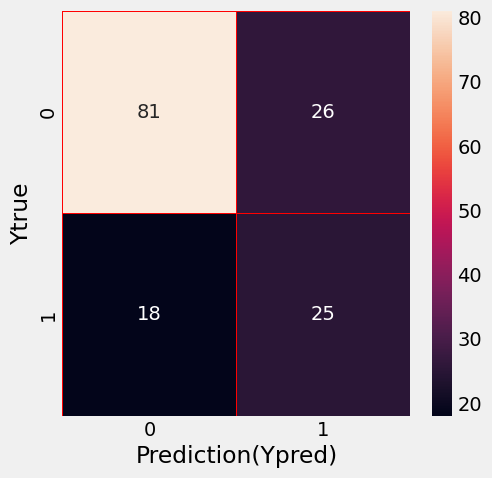

In [41]:
#Confusion Matrix

yprediciton5= DTC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="17"></a><br>
# Random Forest

In [42]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))


Decision Tree Score:  0.7266666666666667


In [43]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT

#### 1(m)
rubric={points:1}

Calcuate cross_val_score using Random Forest model with 10-fold cross validation

1(m) solution:

In [44]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(RFC, x_train, y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7468926553672316
Standart Deviation Accuracies:  0.058511137891561996


In [45]:
RFC.fit(x_train,y_train) # learning
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.8733333333333333


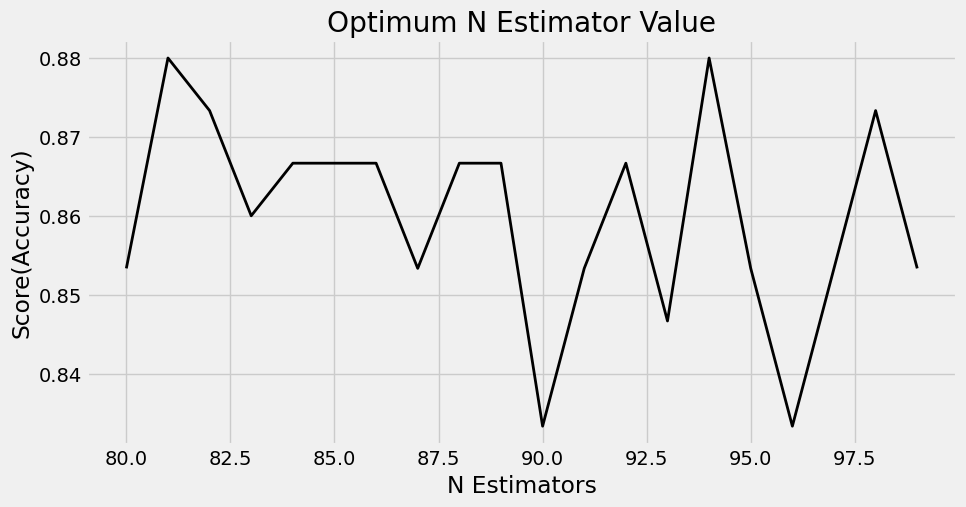

In [46]:
#Find Optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

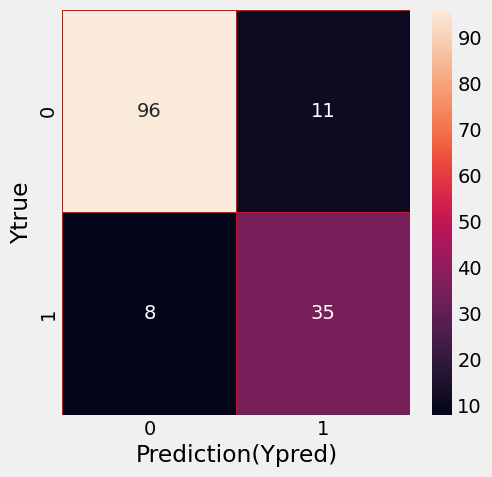

In [47]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="18"></a><br>
# Artificial Neural Network (ANN)

In [48]:
#Import Library
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

In [49]:
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =x_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

In [50]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = x_train, y= y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/500
15/15 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.6604
Epoch 2/500
15/15 [==============================] - 0s 902us/step - loss: 0.6887 - accuracy: 0.6583
Epoch 3/500
15/15 [==============================] - 0s 858us/step - loss: 0.6835 - accuracy: 0.6583
Epoch 4/500
15/15 [==============================] - 0s 832us/step - loss: 0.6756 - accuracy: 0.6583
Epoch 5/500
15/15 [==============================] - 0s 914us/step - loss: 0.6565 - accuracy: 0.6583
Epoch 6/500
15/15 [==============================] - 0s 852us/step - loss: 0.5954 - accuracy: 0.6583
Epoch 7/500
15/15 [==============================] - 0s 814us/step - loss: 0.5366 - accuracy: 0.6583
Epoch 8/500
15/15 [==============================] - 0s 892us/step - loss: 0.5039 - accuracy: 0.6583
Epoch 9/500
15/15 [==============================] - 0s 862us/step - loss: 0.4891 - accuracy: 0.6583
Epoch 10/500
15/15 [==============================] - 0s 805us/step - loss: 0.4778 - accuracy

In [51]:
ANNmean = accuracies.mean()

<a id ="19"></a><br>
## Gradient Boosting Machine (GBM)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)

y_pred = gbm_model.predict(x_test)
testscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8466666666666667

In [53]:
### Model Tuning

gbm_params = {"learning_rate" : [0.001, 0.01],
             "n_estimators": [100,500],
             "max_depth": [3,10],
             "min_samples_split": [2,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(x_train, y_train)

print("The Best Parameters: " + str(gbm_cv.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
The Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned =  gbm.fit(x_train,y_train)
y_pred = gbm_tuned.predict(x_test)
crosscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8333333333333334

In [55]:
gbmscore = gbm.score(x_test,y_test)

<a id ="20"></a><br>
# Evaluation of Results

<a id ="21"></a><br>
## F1 Score Calculation

In [56]:
#F1-Score For Logistic Regression
from sklearn.metrics import f1_score
LRf1 = f1_score(ytrue, yprediciton1, average='weighted') 
LRf1

0.8584376214535561

In [57]:
#K-NN
KNNf1= f1_score(ytrue, yprediciton2, average='weighted') 
KNNf1

0.7449399717514125

In [58]:
#SVM
SVMf1=f1_score(ytrue, yprediciton3, average='weighted') 
SVMf1

0.84

In [59]:
#naive bayes
NBf1 = f1_score(ytrue, yprediciton4, average='weighted') 
NBf1

0.8429096989966555

In [60]:
#Decision Tree
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.7134531432899539

In [61]:
#RandomForest
RFf1=f1_score(ytrue, yprediciton6, average='weighted') 
RFf1

0.8745676908603582

<a id ="22"></a><br>
# Result Visialization

In [62]:

scores=[LRscore,KNNscore,SVMscore,NBscore,DTCscore,RFCscore,mean,gbmscore]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Naive Bayes","Decision Tree", "Random Forest","Artificial Neural Network","Gradient Boosting Machine"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Scatter Plot For Comparasion of ML Algorithms Prediciton Scores (F1)

In [63]:
scoresf1=[LRf1,KNNf1,SVMf1,NBf1,DTf1,RFf1]
#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scoresf1,
    name='Algortms Name',
    marker =dict(color='rgba(225,126,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group", 
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores(F1)',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Conclusion

1. Various ML Classification Algorithms were compared with the Pima Indians Diabetes Database.
2. The best result is with Random Forest and SVM.

